In [1]:
import numpy as np
from mat4py import loadmat
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.datasets import make_classification
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = loadmat('Dataset1.mat')
data2 = loadmat('Dataset2.mat')
data.keys()

dict_keys(['X', 'y', 'yval', 'Xval'])

In [3]:
data.keys()
x = data['X']
y = data['y']
label = []
for i in range(len(y)):
    label.append(y[i][0])
    
datas = pd.DataFrame(x, columns=['x1','x2'])
datas['y'] = label

In [4]:

x2 = data2['X']
y2= data2['y']
label2 = []
for i in range(len(y2)):
    label2.append(y2[i][0])
    
datas2 = pd.DataFrame(x2, columns=['x1','x2'])
datas2['y'] = label2

In [5]:
class PreprocessData:
    def NomalizeData(Data):
        Data=np.array(Data)
        lenght = len(Data)
        normalizedData = []
        
        for i in range (lenght):
            normalizedData.append(float((Data[i] - min(Data) ) / ( max(Data) - min(Data)) ))
            
        return normalizedData
    
    def TestAndTrain(Data , PercentageOfTrainData):
        PercentageOfTrainData = float(PercentageOfTrainData / 100)
        Train_DataFrame = Data.sample(frac=PercentageOfTrainData)
        Test_DataFrame =Data.drop(Train_DataFrame.index)
        
        return Train_DataFrame , Test_DataFrame
    

In [6]:
#split data1
Dataset = PreprocessData.TestAndTrain(datas , 80)


TrainData = Dataset[0]
TestData = Dataset[1]
data = np.array(TrainData)
Y = TrainData['y']
Y = np.array(Y)
data = TrainData.drop('y',axis=1)
X = np.array(data)
y_test = np.array(TestData['y'])
X_test = np.array(TestData.drop('y',axis=1))

#split data2 
Dataset2 = PreprocessData.TestAndTrain(datas2 , 80)


TrainData2 = Dataset2[0]
TestData2 = Dataset2[1]
data2 = np.array(TrainData2)
Y2 = TrainData2['y']
Y2 = np.array(Y2)
data2 = TrainData2.drop('y',axis=1)
X2 = np.array(data2)
y_test2 = np.array(TestData2['y'])
X_test2 = np.array(TestData2.drop('y',axis=1))

In [7]:
Y[Y==0] = -1
Y2[Y2==0] = -1
y_test[y_test==0] = -1
y_test2[y_test2==0] = -1

In [8]:
class SVMclassifier:
    def __init__(self , C=100):
        self.C = C
        self.W = 0
        self.b = 0
    def Calcloss(self , W , b , X,Y):
        loss = 0.0
        loss += (np.dot(W , W.T) / 2)
        
        for i in range (len(X)):
            ti = Y[i] * (np.dot(W,X[i].T)+b)
            loss += self.C * max(0 , 1-ti)
        return loss[0][0]
    def fit(self , X , Y , size = 1000, alpha = 0.001 , itration = 1000):
        numberOfFeatures = X.shape[1]
        numberOfsamples = len(X)
        n = alpha 
        c = self.C
        losess = []
        
        indexes = np.arange(numberOfsamples)
        np.random.shuffle(indexes)
        W = np.zeros((1,numberOfFeatures))
        
        bias = 0 
        
        for i in range(itration):
            l = self.Calcloss(W , bias ,X , Y)
            losess.append(l)
            for start in range( 0 , numberOfsamples , size  ):
                wgradiant = 0
                biasgradiant = 0 
                
                for e in range (start , start + size):
                     if (e < numberOfsamples):
                            x = indexes[e]
                            ti = Y[x] * (np.dot(W,X[e].T)+bias)
                            if (ti > 1):
                                continue
                            else:
                                wgradiant += c *Y[x] *X[x]
                                biasgradiant += c *Y[x]
                                
                W = W - (n*W )+( n*wgradiant)
                bias = bias + n * biasgradiant
        self.W = W
        self.b = bias 
        return self.W , self.b , losess 

In [9]:
def sigmoid(z):
    return (1 / (1 + np.exp(-1*z)))
def hypotesis(x,w,b):
    z = b+w[0][0]*x[:,0] + w[0][1]*x[:,1]
    yhat = sigmoid(z)
    return yhat

def hypotesis1(x,w,b):
    z = b+w[0]*x[:,0] + w[1]*x[:,1]
    yhat = sigmoid(z)
    return yhat
    
    

In [10]:
def plot_decision_boundary(X, w, b , y):
    # X --> Inputs
    # w --> weights
    # b --> bias
    
    # The Line is y=mx+c
    # So, Equate mx+c = w.X + b
    # Solving we find m and c
    x1 = [min(X[:,0]), max(X[:,0])]
    x1 = np.array(x1)
    m = -w[0]/w[1]
    c = -b/w[1]
    x2 = m*x1 + c
   
    # Plotting
    fig = plt.figure(figsize=(10,8))
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "g^")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
   
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.title('Decision Boundary')
    plt.plot(x1, x2, 'y-')

In [11]:
svm = SVMclassifier()
w, b, losses = svm.fit(X,Y)

Youre accuracy is  =  81.06508875739645


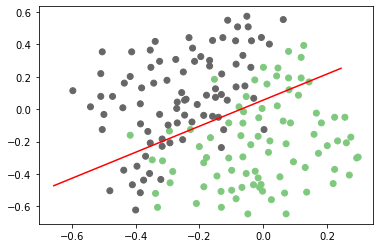

In [12]:
pred = hypotesis(X,w,b)
predicted = []
for i in range(len(pred)):
    if(pred[i] > 0.5):
        predicted.append(1)
    else:
        predicted.append(-1)
np.array(predicted)

predicted  = hypotesis(X,w,b)
predicted[predicted > 0.5] =1
predicted[predicted <= 0.5] = -1
acc1 = np.mean(Y == predicted)
print('Youre accuracy is  = ',acc1*100)
x1 = np.arange(min(X[:,0])*1.1,max(X[:,0])*1.1,0.1)
x2 = -(b + w[0][0]*x1)/w[0][1]
plt.figure()
plt.scatter(X[:,0],X[:,1] , c=Y , cmap= plt.cm.Accent)
plt.plot(x1,x2,'red')
plt.show()

Youre accuracy is  =  83.4319526627219


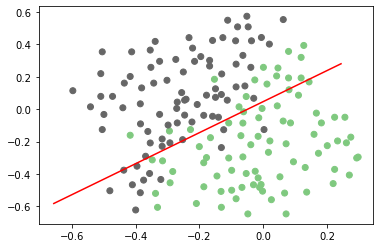

In [13]:
#train for C1 
svm = SVMclassifier(C=1)
w  , b  , losses = svm.fit(X,Y)
pred = hypotesis(X,w,b)
predicted = []
for i in range(len(pred)):
    if(pred[i] > 0.5):
        predicted.append(1)
    else:
        predicted.append(-1)
np.array(predicted)

predicted  = hypotesis(X,w,b)
predicted[predicted > 0.5] =1
predicted[predicted <= 0.5] = -1
acc1 = np.mean(Y == predicted)
print('Youre accuracy is  = ',acc1*100)
x1 = np.arange(min(X[:,0])*1.1,max(X[:,0])*1.1,0.1)
x2 = -(b + w[0][0]*x1)/w[0][1]
plt.figure()
plt.scatter(X[:,0],X[:,1] , c=Y , cmap= plt.cm.Accent)
plt.plot(x1,x2,'red')
plt.show()

Youre accuracy is  =  95.23809523809523


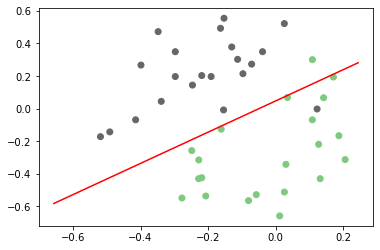

In [14]:
#test for C1 
predicted  = hypotesis(X_test,w,b)
predicted[predicted > 0.5] =1
predicted[predicted <= 0.5] = -1
acc1 = np.mean(y_test == predicted)
print('Youre accuracy is  = ',acc1*100)
x1 = np.arange(min(X[:,0])*1.1,max(X[:,0])*1.1,0.1)
x2 = -(b + w[0][0]*x1)/w[0][1]
plt.figure()
plt.scatter(X_test[:,0],X_test[:,1] , c=y_test , cmap= plt.cm.Accent)
plt.plot(x1,x2,'red')
plt.show()

Youre accuracy is  =  79.28994082840237


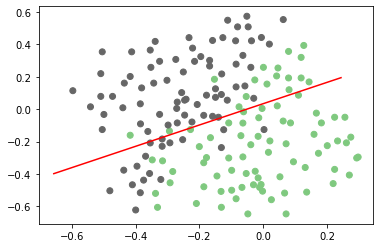

In [15]:
#train for C10
svm = SVMclassifier(C=10)
w  , b  , losses = svm.fit(X,Y)
pred = hypotesis(X,w,b)
predicted = []
for i in range(len(pred)):
    if(pred[i] > 0.5):
        predicted.append(1)
    else:
        predicted.append(-1)
np.array(predicted)

predicted  = hypotesis(X,w,b)
predicted[predicted > 0.5] =1
predicted[predicted <= 0.5] = -1
acc1 = np.mean(Y == predicted)
print('Youre accuracy is  = ',acc1*100)
x1 = np.arange(min(X[:,0])*1.1,max(X[:,0])*1.1,0.1)
x2 = -(b + w[0][0]*x1)/w[0][1]
plt.figure()
plt.scatter(X[:,0],X[:,1] , c=Y , cmap= plt.cm.Accent)
plt.plot(x1,x2,'red')
plt.show()

Youre accuracy is  =  90.47619047619048


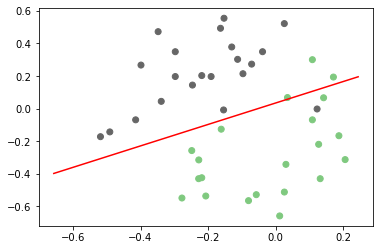

In [16]:
#test for C10

predicted  = hypotesis(X_test,w,b)
predicted[predicted > 0.5] =1
predicted[predicted <= 0.5] = -1
acc1 = np.mean(y_test == predicted)
print('Youre accuracy is  = ',acc1*100)
x1 = np.arange(min(X[:,0])*1.1,max(X[:,0])*1.1,0.1)
x2 = -(b + w[0][0]*x1)/w[0][1]
plt.figure()
plt.scatter(X_test[:,0],X_test[:,1] , c=y_test , cmap= plt.cm.Accent)
plt.plot(x1,x2,'red')
plt.show()

Youre accuracy is  =  78.69822485207101


/var/folders/gv/29bx0dbj5fvf2ql1sq4xwxsh0000gn/T/ipykernel_23263/3060243996.py:2: RuntimeWarning: overflow encountered in exp
  return (1 / (1 + np.exp(-1*z)))


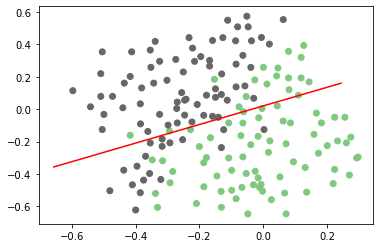

In [17]:
#train for C100
svm = SVMclassifier(C=100)
w  , b  , losses = svm.fit(X,Y)
pred = hypotesis(X,w,b)
predicted = []
for i in range(len(pred)):
    if(pred[i] > 0.5):
        predicted.append(1)
    else:
        predicted.append(-1)
np.array(predicted)

predicted  = hypotesis(X,w,b)
predicted[predicted > 0.5] =1
predicted[predicted <= 0.5] = -1
acc1 = np.mean(Y == predicted)
print('Youre accuracy is  = ',acc1*100)
x1 = np.arange(min(X[:,0])*1.1,max(X[:,0])*1.1,0.1)
x2 = -(b + w[0][0]*x1)/w[0][1]
plt.figure()
plt.scatter(X[:,0],X[:,1] , c=Y , cmap= plt.cm.Accent)
plt.plot(x1,x2,'red')
plt.show()

Youre accuracy is  =  90.47619047619048


/var/folders/gv/29bx0dbj5fvf2ql1sq4xwxsh0000gn/T/ipykernel_23263/3060243996.py:2: RuntimeWarning: overflow encountered in exp
  return (1 / (1 + np.exp(-1*z)))


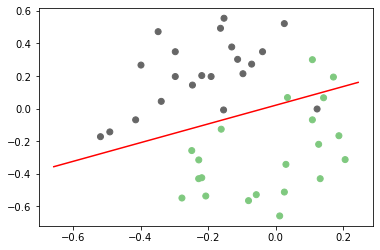

In [18]:
#test for C100

predicted  = hypotesis(X_test,w,b)
predicted[predicted > 0.5] =1
predicted[predicted <= 0.5] = -1
acc1 = np.mean(y_test == predicted)
print('Youre accuracy is  = ',acc1*100)
x1 = np.arange(min(X[:,0])*1.1,max(X[:,0])*1.1,0.1)
x2 = -(b + w[0][0]*x1)/w[0][1]
plt.figure()
plt.scatter(X_test[:,0],X_test[:,1] , c=y_test , cmap= plt.cm.Accent)
plt.plot(x1,x2,'red')
plt.show()

Youre accuracy is  =  81.06508875739645


/var/folders/gv/29bx0dbj5fvf2ql1sq4xwxsh0000gn/T/ipykernel_23263/3060243996.py:2: RuntimeWarning: overflow encountered in exp
  return (1 / (1 + np.exp(-1*z)))


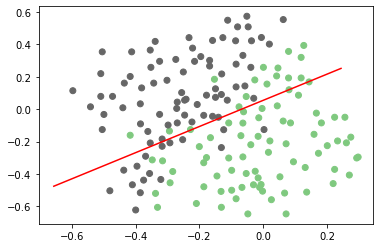

In [19]:
#train for C1000
svm = SVMclassifier(C=1000)
w  , b  , losses = svm.fit(X,Y)
pred = hypotesis(X,w,b)
predicted = []
for i in range(len(pred)):
    if(pred[i] > 0.5):
        predicted.append(1)
    else:
        predicted.append(-1)
np.array(predicted)

predicted  = hypotesis(X,w,b)
predicted[predicted > 0.5] =1
predicted[predicted <= 0.5] = -1
acc1 = np.mean(Y == predicted)
print('Youre accuracy is  = ',acc1*100)
x1 = np.arange(min(X[:,0])*1.1,max(X[:,0])*1.1,0.1)
x2 = -(b + w[0][0]*x1)/w[0][1]
plt.figure()
plt.scatter(X[:,0],X[:,1] , c=Y , cmap= plt.cm.Accent)
plt.plot(x1,x2,'red')
plt.show()

Youre accuracy is  =  92.85714285714286


/var/folders/gv/29bx0dbj5fvf2ql1sq4xwxsh0000gn/T/ipykernel_23263/3060243996.py:2: RuntimeWarning: overflow encountered in exp
  return (1 / (1 + np.exp(-1*z)))


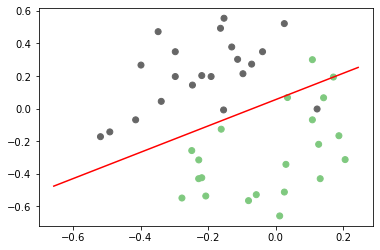

In [20]:
#test for C1000
predicted  = hypotesis(X_test,w,b)
predicted[predicted > 0.5] =1
predicted[predicted <= 0.5] = -1
acc1 = np.mean(y_test == predicted)
print('Youre accuracy is  = ',acc1*100)
x1 = np.arange(min(X[:,0])*1.1,max(X[:,0])*1.1,0.1)
x2 = -(b + w[0][0]*x1)/w[0][1]
plt.figure()
plt.scatter(X_test[:,0],X_test[:,1] , c=y_test , cmap= plt.cm.Accent)
plt.plot(x1,x2,'red')
plt.show()

In [21]:
svm2 = SVMclassifier()
w  , b  , losses = svm2.fit(X2,Y2)

Youre accuracy is  =  54.927536231884055


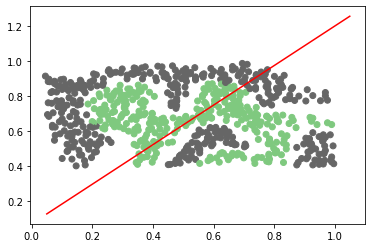

In [22]:
pred = hypotesis(X2,w,b)
predicted = []
for i in range(len(pred)):
    if(pred[i] > 0.5):
        predicted.append(1)
    else:
        predicted.append(-1)
np.array(predicted)

predicted  = hypotesis(X2,w,b)
predicted[predicted > 0.5] =1
predicted[predicted <= 0.5] = -1
acc2 = np.mean(Y2 == predicted)
print('Youre accuracy is  = ',acc2*100)
x1 = np.arange(min(X2[:,0])*1.1,max(X2[:,0])*1.1,0.1)
x2 = -(b + w[0][0]*x1)/w[0][1]
plt.figure()
plt.scatter(X2[:,0],X2[:,1] , c=Y2 , cmap= plt.cm.Accent)
plt.plot(x1, x2, 'red')
plt.show()